In [10]:
#arquitectura neuronal y evaluación del modelo
import pandas as pd
import numpy as np
#se puede acceder al archivo en el siguiente enlace: https://drive.google.com/drive/folders/1raFsvMowb75Yfij5a7UT8Y_vay57yYBx?usp=sharing
#leer el data
emails=pd.read_csv('/content/emails.csv', index_col=0)

In [11]:
#Copia el DataFrame original.
#Convierte etiquetas no_spam y spam en 0 y 1 respectivamente
df=emails.copy()
df['Prediction']=df['Prediction'].map({'no_spam':0, 'spam':1})

In [12]:
#División de datos de entrenamiento y validación
df_train=df.sample(frac=0.8, random_state=0)
df_valid=df.drop(df_train.index)

In [13]:
#Se separan las variables independientes (X) de la dependiente (y) en entrenamiento y validación
X_train=df_train.drop('Prediction', axis=1)
y_train=df_train['Prediction']
X_valid=df_valid.drop('Prediction', axis=1)
y_valid=df_valid['Prediction']

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_train = le.fit_transform(df_train['Prediction'])
y_valid = le.transform(df_valid['Prediction'])



#DEFINICIÓN DEL MODELO
input_dim = X_train.shape[1]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[input_dim]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])
#Red neuronal secuencial.
#Capas densas (Dense) con activación ReLU y regularización: Dropout, BatchNormalization).
#Capa final con activación sigmoide para clasificación binaria.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#compilacion del modelo con optimizador adam, función de perdida: 'binary_crossentropy'
#y metrica de precisión binaria

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
#Evitar sobreentrenamiento: detiene si no mejora en 10 épocas.
#Recupera los mejores pesos
early_stopping=keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

In [16]:
#Entrena el modelo con batch size de 512.
#Hasta 1000 épocas, o hasta que early stopping lo detenga antes.
history=model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0 #evitar que imprima todas las epocas
)

best validation loss: 0.0022
 best validation accuracy: 1.0000


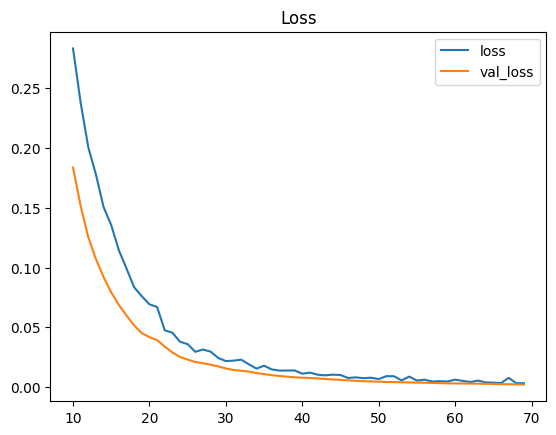

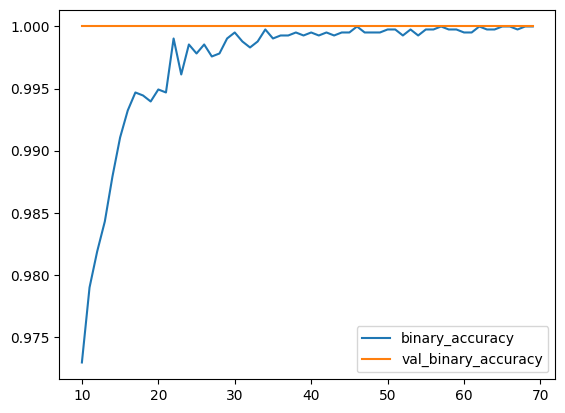

In [17]:
#visualización y evaluación
history_df=pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot(title='Loss')
history_df.loc[10:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print('best validation loss: {:0.4f}\n best validation accuracy: {:0.4f}'.format(
    history_df['val_loss'].min(),
    history_df['val_binary_accuracy'].max()
))
